In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sebn

In [2]:
pyco = pd.read_csv("movies.csv")

In [3]:
pyco.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
pyco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Data Cleaning

In [5]:
pyco.columns= [col.capitalize() for col in pyco.columns]
pyco.head()       

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
pyco.isnull().sum()

Name           0
Rating        77
Genre          0
Year           0
Released       2
Score          3
Votes          3
Director       0
Writer         3
Star           1
Country        3
Budget      2171
Gross        189
Company       17
Runtime        4
dtype: int64

In [7]:
pyco[pyco.isna().any(axis=1)]

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [8]:
pyco['Votes'] = pyco['Votes'].astype('Int64')
pyco['Budget'] = pyco['Budget'].astype('Int64')
pyco['Gross']=pyco['Gross'].astype('Int64')

In [9]:
pyco.dtypes

Name         object
Rating       object
Genre        object
Year          int64
Released     object
Score       float64
Votes         Int64
Director     object
Writer       object
Star         object
Country      object
Budget        Int64
Gross         Int64
Company      object
Runtime     float64
dtype: object

In [10]:
pyco[['Released_Date','Released_Country']]= pyco.Released.str.split('(',expand=True)

In [11]:
pyco['Released_Country']= pyco.Released_Country.str[:-1]

In [12]:
pyco.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Released_Date,Released_Country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [13]:
pyco = pyco.drop('Released',axis=1)
pyco.head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Released_Date,Released_Country
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [14]:
pyco.dropna(how='any',inplace=True)

In [15]:
pyco['Released_Date']= pd.to_datetime(pyco['Released_Date'])
pyco.dtypes

Name                        object
Rating                      object
Genre                       object
Year                         int64
Score                      float64
Votes                        Int64
Director                    object
Writer                      object
Star                        object
Country                     object
Budget                       Int64
Gross                        Int64
Company                     object
Runtime                    float64
Released_Date       datetime64[ns]
Released_Country            object
dtype: object

In [16]:
pyco['Month']= pyco['Released_Date'].dt.month
pyco.head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Released_Date,Released_Country,Month
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,6
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,6
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,7
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,7


In [17]:
pyco['Rating']=pyco['Rating'].str.replace('Not Rated','Unrated')

# EDA

In [18]:
pyco.describe()

,Year,Score,Votes,Budget,Gross,Runtime,Month
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739,6.656336
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698,3.465666
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,1.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000,4.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000,7.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000,10.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,12.000000


##  1) Top 5 grossing movies

In [19]:
pyco = pyco.sort_values(by='Gross',ascending=False)
pyco.head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Released_Date,Released_Country,Month
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States,12
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States,4
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States,12
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States,12
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,4


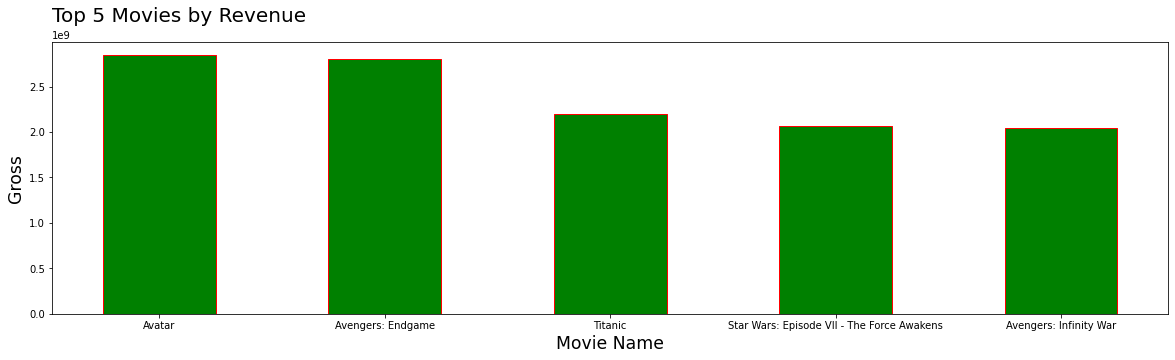

In [20]:
x=pyco['Name'].head()
y=pyco['Gross'].head()
plt.figure(figsize=(20,5))
plt.bar(x,y,color='g',width=0.5,edgecolor='red')
plt.xlabel("Movie Name",fontsize='xx-large')
plt.ylabel("Gross",fontsize='xx-large')
plt.title('Top 5 Movies by Revenue', loc='left', fontsize=20, pad=20)
plt.show()

### Avatar and Avengers Endgame are the top 2 highest grossing films of all time

## 2) Top five best movies by score

In [21]:
Best_Movie = pyco.sort_values(by='Score',ascending=False)
Best_Movie.head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Released_Date,Released_Country,Month
2443,The Shawshank Redemption,R,Drama,1994,9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0,1994-10-14,United States,10
5243,The Dark Knight,PG-13,Action,2008,9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0,2008-07-18,United States,7
2247,Schindler's List,R,Biography,1993,8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195.0,1994-02-04,United States,2
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0,2003-12-17,United States,12
2444,Pulp Fiction,R,Crime,1994,8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0,1994-10-14,United States,10


###   The Shawshank Redemption,  The Dark Knight,   Schindler's List,   The Lord of the Rings: The Return of the King,   Pulp Fiction 

## 3 ) How many movies where released every year ?

In [22]:
b= pyco.groupby('Year').count()
b['Name']

Year
1980     40
1981     63
1982     71
1983     83
1984     88
1985     95
1986     99
1987    104
1988    130
1989    115
1990    111
1991    113
1992    131
1993    140
1994    128
1995    138
1996    144
1997    149
1998    148
1999    162
2000    162
2001    164
2002    173
2003    159
2004    158
2005    170
2006    163
2007    157
2008    171
2009    171
2010    164
2011    160
2012    162
2013    161
2014    163
2015    156
2016    158
2017    133
2018    143
2019    113
2020      8
Name: Name, dtype: int64

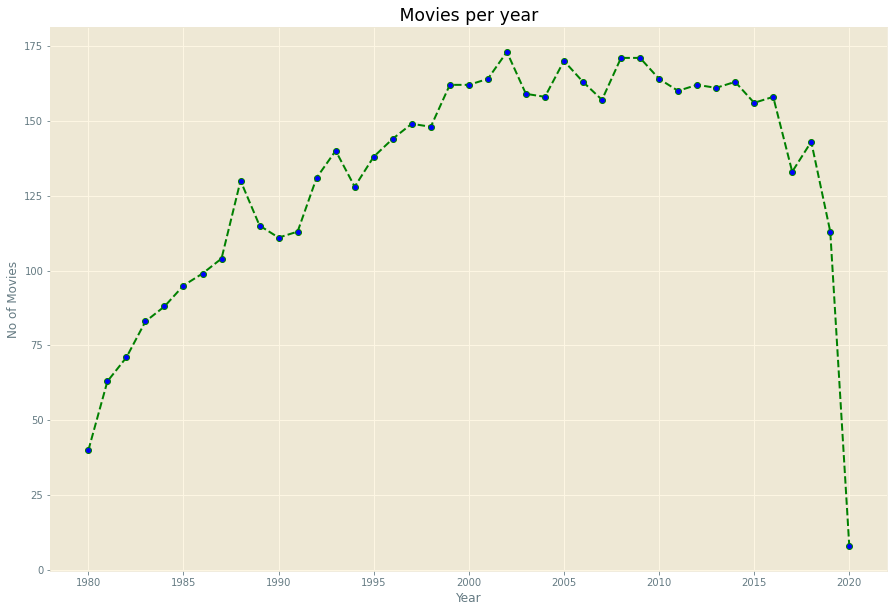

In [23]:
plt.figure(figsize=(15,10))
plt.style.use('Solarize_Light2')
plt.plot(b.index,b['Name'],'go--',linewidth=2,markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('No of Movies')
plt.title(' Movies per year ',loc='center',fontsize='xx-large')
plt.show()

### Steady fall in 2020 observed due to covid-19 pandemic

## 4) In which month of the year movies are released?

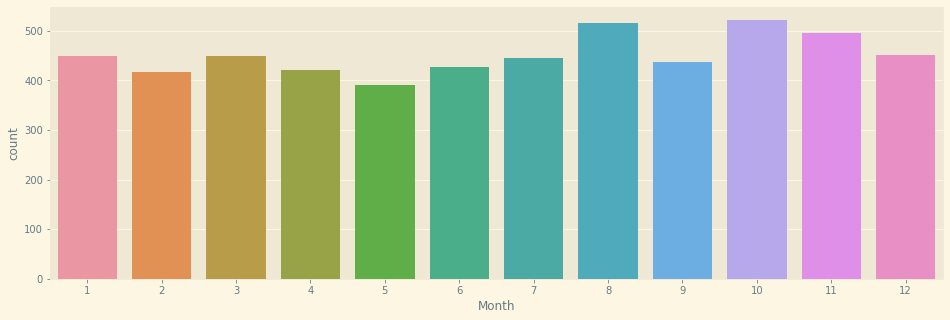

In [24]:
plt.figure(figsize = (16,5))
sebn.countplot(x='Month',data=pyco,linewidth=5)
plt.show()

### October month 

## 5)  Correlation 

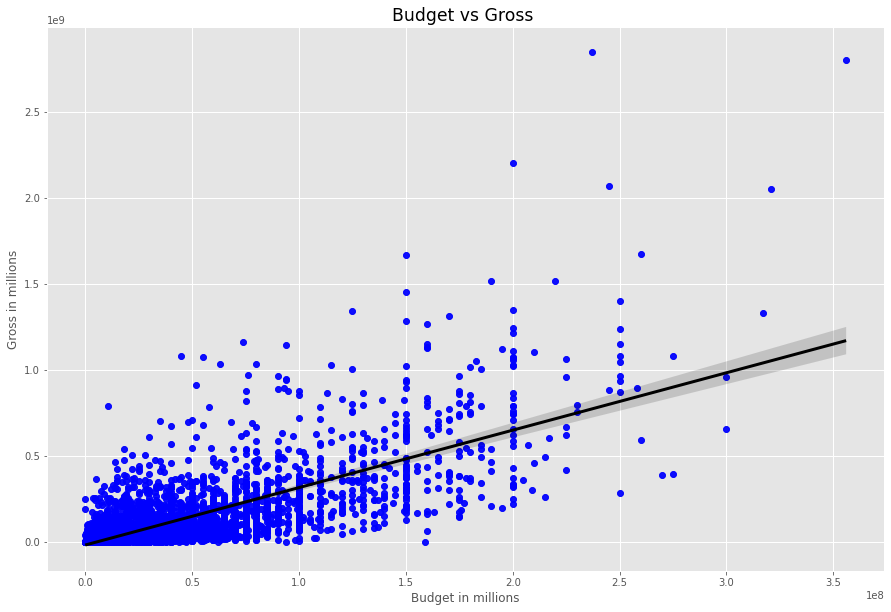

In [25]:
from matplotlib import style
plt.style.use('ggplot')
  
x=pyco['Budget']
y=pyco['Gross']
plt.figure(figsize=(15,10))
plt.scatter(x,y,alpha=0.7,label='Earnings (USD)',color='b')
plt.title('Budget vs Gross ',loc='center',fontsize='xx-large')
sebn.regplot(x=pyco['Budget'].astype('float'),y=pyco['Gross'].astype('float'),data=pyco,color='b',line_kws={'color':'black'})
plt.xlabel('Budget in millions')
plt.ylabel('Gross in millions')
plt.show()

In [26]:
new = pyco.corr()
new

,Year,Score,Votes,Budget,Gross,Runtime,Month
Year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,-0.024778
Score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.050600
Votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.058735
Budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.066027
Gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.057939
Runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.074534
Month,-0.024778,0.050600,0.058735,0.066027,0.057939,0.074534,1.000000



###  There is positive correlation of 0.74 between Budget and Gross. Greater the Budget of a movie, higher its earnings.


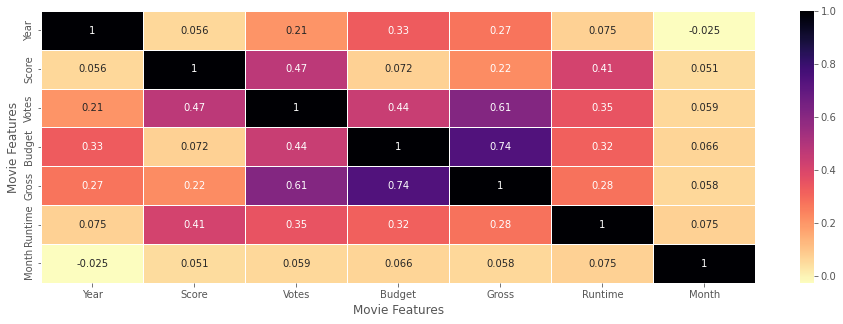

In [27]:
plt.figure(figsize = (16,5))
sebn.heatmap(new,annot=True,linewidths=.5,cmap="magma_r")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [28]:
pyco_num = pyco.copy()

for col in pyco_num.columns:
    if(pyco_num[col].dtype=='object'):
        pyco_num[col]=pyco_num[col].astype('category')
        pyco_num[col]=pyco_num[col].cat.codes               
        
pyco_num.head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Released_Date,Released_Country,Month
5445,386,4,0,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009-12-18,47,12
7445,388,4,0,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019-04-26,47,4
3045,4909,4,6,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997-12-19,47,12
6663,3643,4,0,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015-12-18,47,12
7244,389,4,0,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018-04-27,47,4


In [29]:
core = pyco_num.corr().unstack()
sort = core[(core!=1)&(core>0.25)].sort_values(ascending=False).drop_duplicates()
sort

Budget  Gross       0.740247
Votes   Gross       0.614751
Score   Votes       0.474256
Budget  Votes       0.439675
Score   Runtime     0.414068
Votes   Runtime     0.352303
Year    Budget      0.327722
Budget  Runtime     0.318695
Gross   Runtime     0.275796
        Year        0.274321
Writer  Director    0.261735
dtype: float64

### Higher grossing films have the highest number of votes( 0.61 ).
### Longer the movie run time more the budget required.

In [30]:
a= core[(core!=1)&(core<-0.24)].sort_values(ascending=False).drop_duplicates()
a

Rating  Budget   -0.241907
Genre   Gross    -0.244101
        Budget   -0.368523
dtype: float64

### Genre and Budget of a movie have negative correlation. It means the genre of a film neither decides a movie's intial budget allocation nor its gross earnings.

## 6) Highest revenue generated year

In [31]:
p= pyco.groupby('Year').sum().sort_values(by='Gross',ascending=False)
p[['Budget','Gross']].head()

,Budget,Gross
Year,,
2016,8785000000,27847564254
2019,6636950000,27692665244
2017,7409700000,27679802575
2018,7012980000,27558520701
2015,7319726148,26216913808


###  Eventhough Year '2016'  is not the year in which highest number of films were produced, it is the highest revenue generating year.

## 7) Which genre has generated more revenue and are there more movies made in certain genre?

C:\Users\hp\AppData\Local\Temp/ipykernel_9368/2674476024.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prodz,rotation='vertical',size=10)


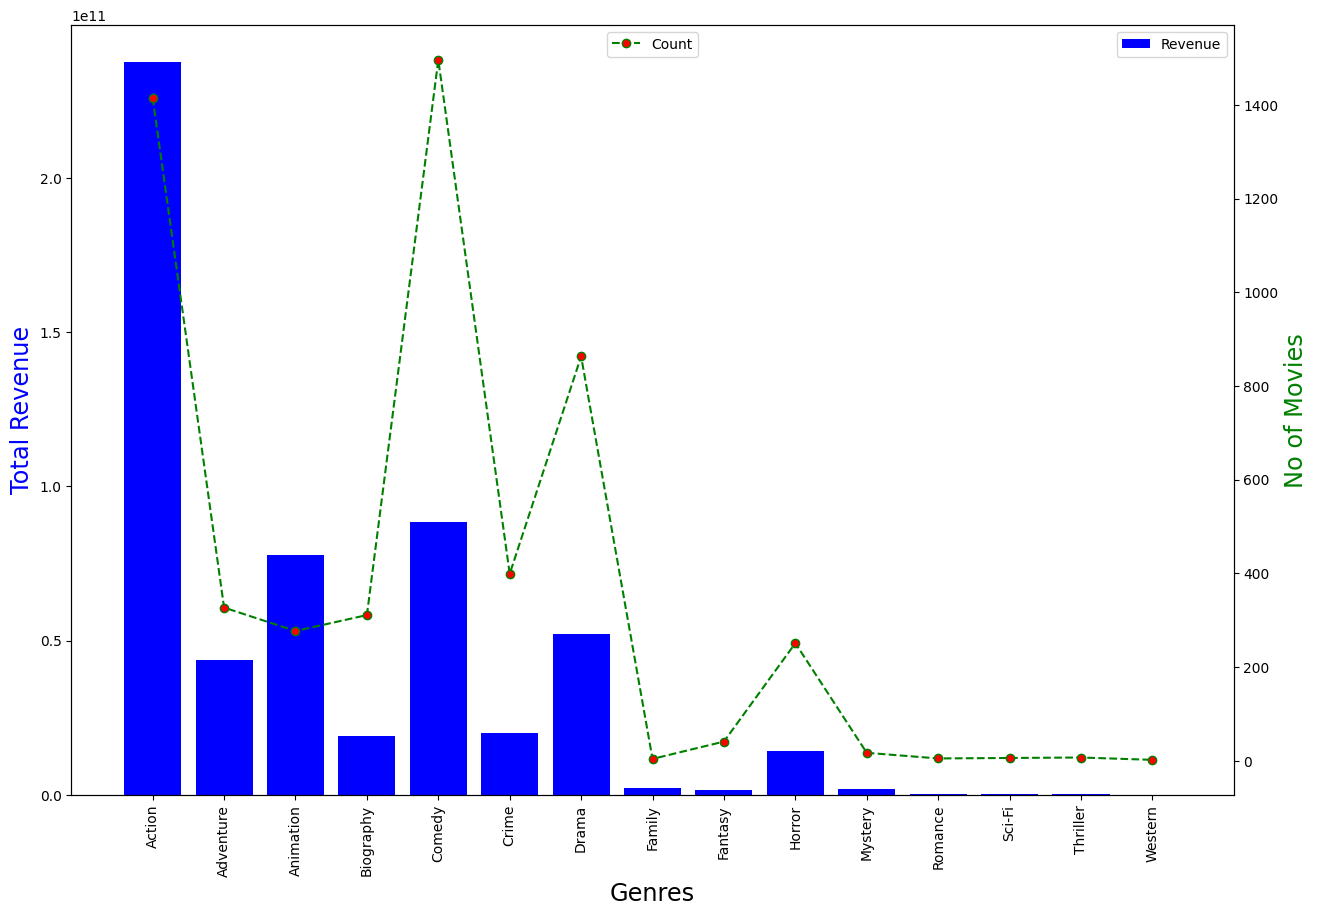

In [32]:
Diff_genres = pyco.groupby('Genre')
gr=Diff_genres.sum()['Gross']
h = pyco.groupby('Genre').count()['Name']
prodz= [p for p,df in Diff_genres]

plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()

ax1.bar(prodz, gr, color = 'b',label='Revenue')
ax1.set_xlabel('Genres',fontsize='xx-large', color = 'black')
ax1.set_ylabel('Total Revenue',fontsize='xx-large',color = 'b')
ax1.set_xticklabels(prodz,rotation='vertical',size=10)
ax1.legend(loc=1)

ax2.plot(prodz,h,'go--',label='Count',markerfacecolor='r')
ax2.set_ylabel('No of Movies', color = 'g',fontsize='xx-large') 
ax2.legend(loc=9)

plt.show()

###  More comedy films have been produced in the span of 40 years.
###  Action movies have generated more earnings.